In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.sans-serif'] = 'stix'

In [2]:
import numpy as np
from numpy import linalg as LA  # Notar que importamos linalg con nickname LA

In [3]:
import sympy

In [4]:
sympy.init_printing()

In [5]:
from scipy import optimize   # the optimize module from the SciPy library

In [6]:
from __future__ import division

In [7]:
C = np.array([[1,1],[1,0]])
print(C)

[[1 1]
 [1 0]]


In [8]:
w, v = LA.eig(C) 
print(w) 
print(v) 

[ 1.61803399 -0.61803399]
[[ 0.85065081 -0.52573111]
 [ 0.52573111  0.85065081]]


In [9]:
AutoV1_C = v[:, [0]]
AutoV2_C = v[:, [1]]
print(AutoV1_C)
print(AutoV2_C)

[[0.85065081]
 [0.52573111]]
[[-0.52573111]
 [ 0.85065081]]


In [14]:
n=100
C = np.random.randn(n,n)
v, w = LA.eig(C)
print(v)
C = (np.transpose(C)+C)/2
v, w = LA.eig(C)
print(v)

[-5.44409498+8.45981826j -5.44409498-8.45981826j -8.05607281+5.8250402j
 -8.05607281-5.8250402j  -9.62030801+1.48236568j -9.62030801-1.48236568j
 -9.67211815+0.j          9.7639489 +0.j          7.60826278+6.31233209j
  7.60826278-6.31233209j  0.39876069+9.51686788j  0.39876069-9.51686788j
 -3.63962069+8.85679131j -3.63962069-8.85679131j  8.29200207+4.9475787j
  8.29200207-4.9475787j   2.62344355+8.65213928j  2.62344355-8.65213928j
  4.88989111+7.47195077j  4.88989111-7.47195077j -6.11035205+6.31579358j
 -6.11035205-6.31579358j -7.4260798 +4.26757391j -7.4260798 -4.26757391j
 -8.18795478+0.j          8.36485267+2.793895j    8.36485267-2.793895j
  3.24117217+7.75737844j  3.24117217-7.75737844j  6.3807892 +5.56447437j
  6.3807892 -5.56447437j -6.23568504+5.7038832j  -6.23568504-5.7038832j
  6.99177676+4.20559193j  6.99177676-4.20559193j  7.81598286+0.25694337j
  7.81598286-0.25694337j -0.39816028+7.99826563j -0.39816028-7.99826563j
  7.37000045+1.66515745j  7.37000045-1.66515745j -2.2353

In [11]:
Cinv = LA.inv(C)
print(Cinv)

[[-0.76361751 -0.40594343]
 [-0.40594343  1.07197693]]


In [12]:
np.dot(C,Cinv)

array([[1., 0.],
       [0., 1.]])

In [ ]:
"""Optimizacion"""

In [15]:
def f(X):  # las funciones de optimizacion esperan la funcion vectorizada
    x1, x2 = X
    return (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2

In [16]:
x_start = np.array([0,0])

In [18]:
f(x_start)

6

In [19]:
x_opt = optimize.fmin_bfgs(f, x_start)        # Un optimizador

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 52
         Gradient evaluations: 13


In [20]:
x_opt

array([1.88292645, 1.37658596])

In [21]:
x_opt = optimize.fmin_cg(f, x_start)   # Otro optimizador

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 72
         Gradient evaluations: 18


In [22]:
x_opt

array([1.88292612, 1.37658522])

In [23]:
def f_fig(x1,x2):                  #  Para fraficarla necesitamos la funcion de dos variables, no vectorizada
    return (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2

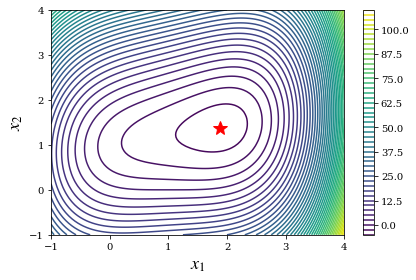

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, f_fig(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)
fig.tight_layout()
fig.savefig('ejemplo.pdf');